## Working with Images

### PIL - library (check it)



In [3]:
# Import all needed libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the MNIST dataset from Keras

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
#return number of itens in the container
print('Training samples:', len(X_train))
print('Test samples:', len(X_test))

print('Shape of individual images:', X_train[0].shape)



Training samples: 60000
Test samples: 10000
Shape of individual images: (28, 28)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

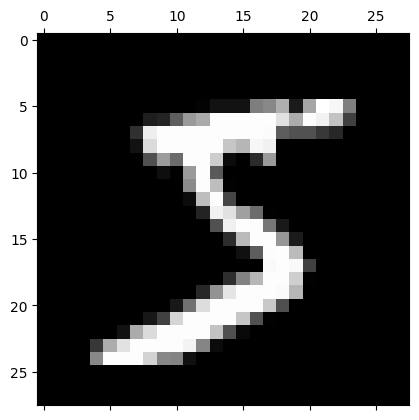

In [7]:
# show the image
plt.matshow(X_train[0], cmap='grey')

In [8]:
#show the match of the image
y_train[0]

5

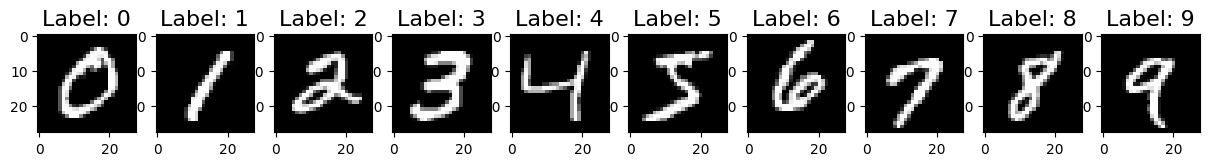

In [9]:
#data not ordered - if I want to see from 0 to 9 in order I do this

num_classes = 10 #0 - 9

_, ax = plt.subplots(1, num_classes, figsize=(15, 15))

for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='grey')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [10]:
#60000 images, in 2d list
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

we scale the pixel values to the range [0,1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustment in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [11]:
##1
X_train = X_train.astype('float32')/ 255
X_test = X_test.astype('float32')/ 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

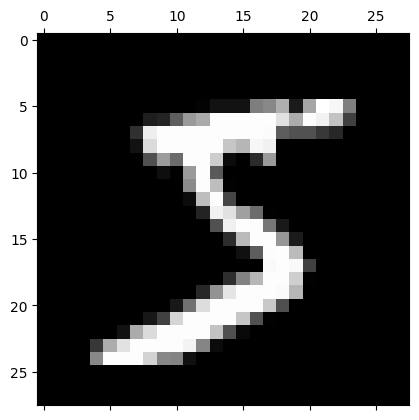

In [12]:
##2 print
plt.matshow(X_train[0], cmap='grey')

X_train[0]

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be flat vector of features. By converting the 2 images matrices into 1D arrays, we transform the data into a format that neural network can work with. This is because the underlaying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as separate feature. This step is essential for the model to process the input image data correctly.

In [13]:
X_train_flatted = X_train.reshape(len(X_train), 28 * 28)
X_test_flatted = X_test.reshape(len(X_test), 28 * 28)



In [14]:
print(X_train_flatted.shape)
print(X_test_flatted.shape)

(60000, 784)
(10000, 784)


## Create an initial Neural Network using Keras
 
We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28 * 28 pixels in each image) and the outputlayer will have 10 neurons as we want to predict a digit, 0-9

In [15]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatted, y_train, epochs=5)

/Users/vanessaarruda/.local/share/virtualenvs/ai-machine-learning-xfgcwpBY/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7992 - loss: 0.7477
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9123 - loss: 0.3135
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.2810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9243 - loss: 0.2704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2601
